# Machine Learning Engineer Nanodegree
## Capstone Proposal
Carlos Santillan

May 7, 2021

## Proposal

For the capstone project for the Udacity Machine Learning Nanodegree, I have selected the classification of dog images using Convolutional Neural Networks (CNN).

### Domain Background

Image classification is a common Machine Learning task, for this project we will be using different ML techniques and will compare the results obtained from them.

I will use different techniques to build an image classifier that will determine the breed of the dog.

Dog breed classification is a well tested machine learning.  For example the following paper describes building CNN to classify the breed, in order to help lost dogs be returned to their owners.

https://arxiv.org/pdf/2007.11986.pdf


### Problem Statement

The purpose of this project is to evaluate different machine learning techniques, and compare and constrast them. In order to do this I will use pre trained models, create a cnn from scratch and finally apply transfer learning techniques. 

I will use VGG-16 model pre trained against the ImageNet dataset to build a dog classifer. We will also create a CNN from scratch and train it with the Dog dataset, finally we wil use transfer learning to train a model 

I will use VGG-16 model pre trained against the ImageNet dataset to build a dog classifer. We will also create a CNN from scratch, finally I will use transfer learning to train a model.


In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


import cv2







https://www.oreilly.com/library/view/ai-and-machine/9781492078180/ch04.html



In [2]:
print(tf.__version__)
print(tf.test.is_gpu_available())


gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
tf.config.experimental.set_memory_growth(gpus[0], True)


2.5.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Datasets and Inputs

For this project I will be using the Standford Dog dataset, This dataset consists of 120 different dog breeds with around 150 images per breed for a total of 20,580 images. 
From this dataset I will for each different breed of dogs I will select a balanced subset of :


This is a popular dataset for dog breed classification models used in research. And it is also available on Kaggle Playground Prediction Competition https://www.kaggle.com/c/dog-breed-identification


The original data source is found on http://vision.stanford.edu/aditya86/ImageNetDogs/ 
```
@inproceedings{KhoslaYaoJayadevaprakashFeiFei_FGVC2011,
author = "Aditya Khosla and Nityananda Jayadevaprakash and Bangpeng Yao and
          Li Fei-Fei",
title = "Novel Dataset for Fine-Grained Image Categorization",
booktitle = "First Workshop on Fine-Grained Visual Categorization,
             IEEE Conference on Computer Vision and Pattern Recognition",
year = "2011",
month = "June",
address = "Colorado Springs, CO",
}
@inproceedings{imagenet_cvpr09,
        AUTHOR = {Deng, J. and Dong, W. and Socher, R. and Li, L.-J. and
                  Li, K. and Fei-Fei, L.},
        TITLE = { {ImageNet: A Large-Scale Hierarchical Image Database} },
        BOOKTITLE = {CVPR09},
        YEAR = {2009},
        BIBSOURCE = "http://www.image-net.org/papers/imagenet_cvpr09.bib"}
```

The dataset is also a part of tensorflow datatest: https://www.tensorflow.org/datasets/catalog/stanford_dogs
```
@misc{TFDS,
  title = { {TensorFlow Datasets}, A collection of ready-to-use datasets},
  howpublished = {\url{https://www.tensorflow.org/datasets}},
}
```

# Load dataset from tensorflow datasets
```
The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. There are 20,580 images, out of which 12,000 are used for training and 8580 for testing. Class labels and bounding box annotations are provided for all the 12,000 images.

```

In [3]:
standford_data,info = tfds.load("stanford_dogs",with_info=True,shuffle_files=True,as_supervised=True)

standford_train, standford_validation= standford_data["train"], standford_data["test"]

assert isinstance(standford_train, tf.data.Dataset)

In [4]:
print(info)


tfds.core.DatasetInfo(
    name='stanford_dogs',
    full_name='stanford_dogs/0.2.0',
    description="""
    The Stanford Dogs dataset contains images of 120 breeds of dogs from around
    the world. This dataset has been built using images and annotation from
    ImageNet for the task of fine-grained image categorization. There are
    20,580 images, out of which 12,000 are used for training and 8580 for
    testing. Class labels and bounding box annotations are provided
    for all the 12,000 images.
    """,
    homepage='http://vision.stanford.edu/aditya86/ImageNetDogs/main.html',
    data_path='C:\\Users\\carlo\\tensorflow_datasets\\stanford_dogs\\0.2.0',
    download_size=778.12 MiB,
    dataset_size=744.72 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=120),
        'objects': Sequence({
            'bbox':

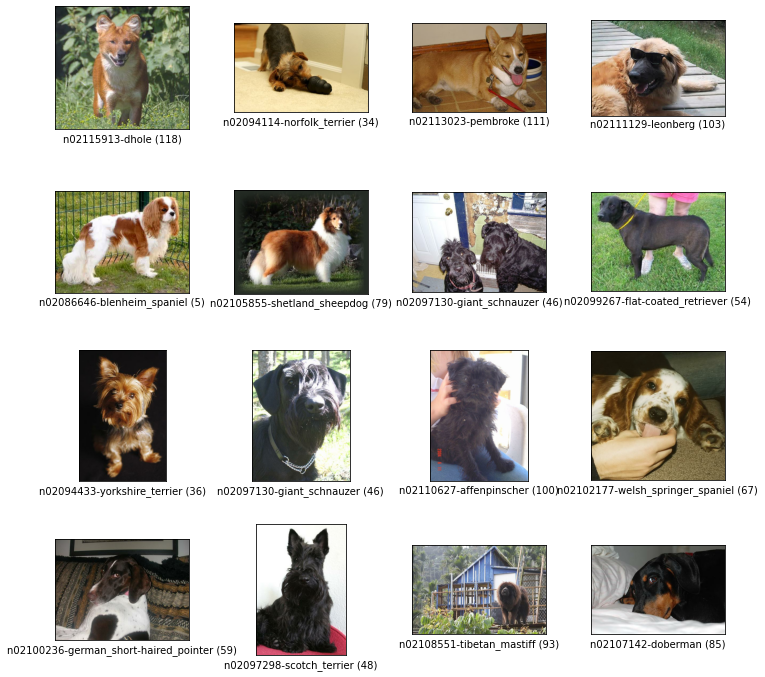

In [5]:
fig = tfds.show_examples(standford_train, info,    rows = 4,   cols =4)

# VGG16

Test performance of the VGG16 model trained with the imagenet dataset




In [6]:
base_model_vg=VGG16(weights='imagenet')
base_model_vg.summary()
IMG_SIZE=224

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
label_names = [cl.split('-')[0] for cl in info.features["label"].names]
label_names

['n02085620',
 'n02085782',
 'n02085936',
 'n02086079',
 'n02086240',
 'n02086646',
 'n02086910',
 'n02087046',
 'n02087394',
 'n02088094',
 'n02088238',
 'n02088364',
 'n02088466',
 'n02088632',
 'n02089078',
 'n02089867',
 'n02089973',
 'n02090379',
 'n02090622',
 'n02090721',
 'n02091032',
 'n02091134',
 'n02091244',
 'n02091467',
 'n02091635',
 'n02091831',
 'n02092002',
 'n02092339',
 'n02093256',
 'n02093428',
 'n02093647',
 'n02093754',
 'n02093859',
 'n02093991',
 'n02094114',
 'n02094258',
 'n02094433',
 'n02095314',
 'n02095570',
 'n02095889',
 'n02096051',
 'n02096177',
 'n02096294',
 'n02096437',
 'n02096585',
 'n02097047',
 'n02097130',
 'n02097209',
 'n02097298',
 'n02097474',
 'n02097658',
 'n02098105',
 'n02098286',
 'n02098413',
 'n02099267',
 'n02099429',
 'n02099601',
 'n02099712',
 'n02099849',
 'n02100236',
 'n02100583',
 'n02100735',
 'n02100877',
 'n02101006',
 'n02101388',
 'n02101556',
 'n02102040',
 'n02102177',
 'n02102318',
 'n02102480',
 'n02102973',
 'n021

In [8]:
def show_image(img):
    plt.imshow(img)
    plt.show()
    
def resize_normalize(image,label):
    image = tf.cast(image,tf.float32)
    image = tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
    image = np.reshape(image,[1,224,224,3])
    
    return image,label

def augmentimages(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_contrast(image, lower=0.0, upper=1.0)
    return image

def get_decode_predictions(predict):
    #print(decode_predictions(predict, top=5))
    synset, imagenet_class_name, prob = decode_predictions(predict, top=1)[0][0]
    return synset,imagenet_class_name, prob


match_cnt = 0
miss_cnt = 0
predicted_list=[]
label_list=[]
for example in standford_validation.take(-1):
    #print(example)
    X_test, y_test = example[0], example[1]
    y=y_test

    X=resize_normalize(X_test,y)

    predict=base_model_vg.predict(X[0])
#     print( np.argmax(predict))
    synset,imagenet_class_name, prob = get_decode_predictions(predict)
    
#     print("Predicted : ",get_decode_predictions(predict))
    label = info.features["label"].int2str(y_test)
    predicted_list.append(synset)
    label_list.append(label.split('-')[0])
#     print("Label :",label)
    if synset == label.split('-')[0]:
#         print("Correct")
        
        match_cnt +=1
    else:
#         print("InCorrect")
        miss_cnt +=1 
    
    
    #show_image(X_test)
    
print("Matched :", match_cnt)
print("Missed :", miss_cnt)


Matched : 3377
Missed : 5203




https://www.kaggle.com/kasmithh/transfer-learning-using-keras-vgg-16


https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html




In [11]:
from sklearn.metrics import classification_report, confusion_matrix

## function to get confusion matrix in a proper format
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

    
def report_model(predict_class, test_class):
#    print("=== Confusion Matrix ===")
#     draw_cm(test_class,predict_class,True)
#    cm = confusion_matrix(test_class, predict_class)
#    print(cm)
    print("=== Classification Report ===")
    print(classification_report(test_class, predict_class))
    
report_model(predicted_list,label_list)

=== Classification Report ===
              precision    recall  f1-score   support

   n01484850       0.00      0.00      0.00         0
   n01494475       0.00      0.00      0.00         0
   n01498041       0.00      0.00      0.00         0
   n01514668       0.00      0.00      0.00         0
   n01580077       0.00      0.00      0.00         0
   n01664065       0.00      0.00      0.00         0
   n01665541       0.00      0.00      0.00         0
   n01675722       0.00      0.00      0.00         0
   n01694178       0.00      0.00      0.00         0
   n01695060       0.00      0.00      0.00         0
   n01704323       0.00      0.00      0.00         0
   n01768244       0.00      0.00      0.00         0
   n01817953       0.00      0.00      0.00         0
   n01860187       0.00      0.00      0.00         0
   n01871265       0.00      0.00      0.00         0
   n01873310       0.00      0.00      0.00         0
   n01877812       0.00      0.00      0.00        

In [ ]:
# def resize(image,label):
 
#     image = tf.cast(image,tf.float32)
#     image = tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
#     image = tf.reshape(image,[1,224,224,3])
    
#     return image,label

# validation = standford_validation.map(resize)
# train =standford_train.map(resize)

# print(train)



In [33]:
IMG_SIZE=224
tl_model_vg=VGG16(weights='imagenet',include_top=False,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3))

tl_model_vg.trainable = False

tl_model_vg.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [87]:
custom_model = tf.keras.models.Sequential()

layer = tl_model_vg
layer.trainable = False
custom_model.add(layer)

custom_model.add(tf.keras.layers.GlobalAveragePooling2D())
custom_model.add(tf.keras.layers.Dropout(0.5))


# custom_model.add(tf.keras.layers.Flatten())
# custom_model.add(tf.keras.layers.Dense(512, activation = 'relu'))

custom_model.add(tf.keras.layers.Dense(120, activation = 'softmax'))

custom_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
#             optimizer='sgd',
#               metrics=['sparse_categorical_accuracy','sparse_top_k_categorical_accuracy'])
#               metrics=['categorical_accuracy'])                     
                metrics=['accuracy'])

custom_model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               61560     
Total params: 14,776,248
Trainable params: 61,560
Non-trainable params: 14,714,688
_________________________________________________________________


In [88]:
DATASET_SIZE=12000
train_size = int(0.85 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

# full_dataset = tf.data.TFRecordDataset(FLAGS.input_file)
standford_train = standford_train.shuffle(1000)
train_dataset = standford_train.take(train_size)
test_dataset = standford_train.skip(train_size)

# val_dataset = test_dataset.skip(val_size)
# test_dataset = test_dataset.take(test_size)

In [89]:
size=(IMG_SIZE,IMG_SIZE)
train_dataset = train_dataset.map(lambda x, y: (tf.image.resize(x, size), y))
test_dataset = test_dataset.map(lambda x, y: (tf.image.resize(x, size), y))
#test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [80]:
batch_size=4

#https://stackoverflow.com/questions/58248297/keras-applications-vgg16-low-accuracy-on-imagenet
from tensorflow.keras.utils import to_categorical


def resize_image(image, shape = (IMG_SIZE,IMG_SIZE)):
    target_width = shape[0]
    target_height = shape[1]
    initial_width = tf.shape(image)[0]
    initial_height = tf.shape(image)[1]
    im = image
    ratio = 0
    if(initial_width < initial_height):
        ratio = tf.cast(256 / initial_width, tf.float32)
        h = tf.cast(initial_height, tf.float32) * ratio
        im = tf.image.resize(im, (256, h), method="bicubic")
    else:
        ratio = tf.cast(256 / initial_height, tf.float32)
        w = tf.cast(initial_width, tf.float32) * ratio
        im = tf.image.resize(im, (w, 256), method="bicubic")
    width = tf.shape(im)[0]
    height = tf.shape(im)[1]
    startx = width//2 - (target_width//2)
    starty = height//2 - (target_height//2)
    im = tf.image.crop_to_bounding_box(im, startx, starty, target_width, target_height)
    return im

def resize_normalize(image,label):
    image = tf.cast(image,tf.float32)
#     image=tf.keras.utils.normalize(image,axis=1)

#     image = tf.image.resize(image,[IMG_SIZE,IMG_SIZE])
#     image = np.reshape(image,[1,IMG_SIZE,IMG_SIZE,3])
    
    return image,label


def scale16(image, label):
    i = image
    i = preprocess_input(i)
    i = tf.cast(i, tf.float32)
#     i = (i/127.5) - 1
    i = resize_image(i, (IMG_SIZE,IMG_SIZE))
    i = preprocess_input(i)
#     i=resize_normalize(image,label)
    

    label=tf.one_hot(label, 120)
#     label=tf.keras.utils.to_categorical(label, num_classes=120)
#    label = tf.cast(tf.one_hot(tf.cast(label, tf.int32), 120), dtype=label.dtype)
    return (i, label)

def batch_set(dataset, batch_size):
    return dataset.map(scale16) \
                  .shuffle(1000) \
                  .batch(batch_size) \
                  .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

def create_batched_datasets(train_dataset,test_dataset,validation_dataset,batch_size = batch_size):
    train = batch_set(train_dataset, batch_size)
    test = batch_set(test_dataset, batch_size)
    val = batch_set(validation_dataset, batch_size)
    return train,test, val

In [81]:
train, test,val = create_batched_datasets(standford_train,test_dataset,standford_validation)


In [71]:
# for r in test.take(1):
#     print(r[1])


In [83]:
import datetime,os

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [84]:

%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 4404), started 9:33:08 ago. (Use '!kill 4404' to kill it.)

In [85]:
#custom_model.fit()

history  = custom_model.fit(train, epochs = 100,validation_data=test,callbacks=[tensorboard_callback])


Epoch 1/100
3000/3000 [==============================] - 171s 54ms/step - loss: 4.7850 - accuracy: 0.0102 - val_loss: 4.7625 - val_accuracy: 0.0111
Epoch 2/100
3000/3000 [==============================] - 173s 55ms/step - loss: 4.7810 - accuracy: 0.0084 - val_loss: 4.7569 - val_accuracy: 0.0183
Epoch 3/100
3000/3000 [==============================] - 173s 55ms/step - loss: 4.7795 - accuracy: 0.0079 - val_loss: 4.7595 - val_accuracy: 0.0150
Epoch 4/100
1887/3000 [=================>............] - ETA: 50s - loss: 4.7796 - accuracy: 0.00784 ETA: 1:01 - loss: 4.778 - ETA: 1:00 - loss: 4.7784 - accu - ETA: 59s - loss: 4.778 - ETA: 58s - loss: - ETA: 55s - loss: 4.7790 - - ETA: 54s - loss: 4.7792 - accurac - ETA: 53s - los

KeyboardInterrupt: 

In [54]:

from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
from tensorflow.keras.layers import BatchNormalization  # Batch normalization

In [58]:
def get_model():

    # Initialising the CNN classifier
    classifier = Sequential()

    # Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    classifier.add(Conv2D(32, (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 3), activation = 'relu', padding = 'same'))
    
#     classifier.add(BatchNormalization())

    # Add a Max Pooling layer of size 2X2
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

    # Adding another pooling layer
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
    classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

    # Adding another pooling layer
    classifier.add(MaxPooling2D(pool_size = (2, 2)))

    # Flattening the layer before fully connected layers
    classifier.add(Flatten())

    # Adding a fully connected layer with 512 neurons
    classifier.add(Dense(units = 256, activation = 'relu'))

    # Adding dropout with probability 0.5
    classifier.add(Dropout(0.5))


    # Adding a fully connected layer with 128 neurons
    classifier.add(Dense(units = 128, activation = 'relu'))


    # The final output layer with 12 neurons to predict the categorical classifcation
    classifier.add(Dense(units = 120, activation = 'softmax'))
    
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    classifier.summary()
    
    return classifier

classifier = get_model()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 54, 54, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 23328)            

In [59]:
history = classifier.fit(train,
               
               epochs = 200,
               validation_data = test,
#                validation_steps=int(nb_validation_samples // batch_size),
                callbacks=[tensorboard_callback]
               )

Epoch 1/200
6000/6000 [==============================] - 83s 13ms/step - loss: 4.9865 - accuracy: 0.0068 - val_loss: 4.7869 - val_accuracy: 0.0067
Epoch 2/200
6000/6000 [==============================] - 81s 13ms/step - loss: 4.7962 - accuracy: 0.0062 - val_loss: 4.7863 - val_accuracy: 0.0072
Epoch 3/200
6000/6000 [==============================] - 86s 14ms/step - loss: 4.7951 - accuracy: 0.0058 - val_loss: 4.7859 - val_accuracy: 0.0100
Epoch 4/200
6000/6000 [==============================] - 81s 13ms/step - loss: 4.7915 - accuracy: 0.0064 - val_loss: 4.7856 - val_accuracy: 0.0117
Epoch 5/200
6000/6000 [==============================] - 81s 13ms/step - loss: 4.7911 - accuracy: 0.0056 - val_loss: 4.7860 - val_accuracy: 0.0133
Epoch 6/200
6000/6000 [==============================] - 81s 13ms/step - loss: 4.7911 - accuracy: 0.0054 - val_loss: 4.7861 - val_accuracy: 0.0089
Epoch 7/200
6000/6000 [==============================] - 84s 14ms/step - loss: 4.7911 - accuracy: 0.0058 - val_loss: 4

KeyboardInterrupt: 

In [ ]:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    
plot_metric(history, 'loss')

In [ ]:
predict.shape

In [ ]:
predict=base_model_vg.predict(test)

In [ ]:

def resize_normalize(image,label):
  
    image = tf.cast(image['image'],tf.float32)
    image = tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
    #image = image / 255.0
  
    return image,label


def augmentimages(image, label):
    image = tf.image.random_flip_left_right(image)
    return image, label


def augment(image, label):
  
  image = tf.image.random_flip_left_right(image)
  
  image = tf.image.random_contrast(image, lower=0.0, upper=1.0)
  
  return image,label

In [ ]:
train = standford_train.map(resize_normalize)

In [ ]:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    
plot_metric(history, 'loss')

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

## function to get confusion matrix in a proper format
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

    
def report_model(y_pred, y_test):
    predict_class = np.argmax(y_pred, axis=1)
    test_class = np.argmax(y_test, axis=1)
    print("Recall Score : ",recall_score(test_class,predict_class,average='micro'))
    print("Precision Score : ",precision_score(test_class,predict_class,average='micro'))
    print("F1 Score : ",f1_score(test_class,predict_class,average='micro'))
 
    print("=== Confusion Matrix ===")
#     draw_cm(test_class,predict_class,True)
    cm = confusion_matrix(test_class, predict_class)
    print(cm)
    print("=== Classification Report ===")
    print(classification_report(test_class, predict_class))
    
    

In [ ]:

def resize(image,label):
 
    image = tf.cast(image,tf.float32)
    image = tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
    image = tf.reshape(image,[1,224,224,3])
    
    return image,label

test = standford_test.map(resize)


In [ ]:
# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in tl_model_vg.layers])

# Getting output tensor of the last VGG layer that we want to include
x = layer_dict['block2_pool'].output

# Stacking a new simple convolutional network on top of it    
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(120, activation='softmax')(x)

# Creating new model. Please note that this is NOT a Sequential() model.
# from keras.models import Model
#custom_model = tf.keras.models.Model(inputs=tl_model_vg.input, outputs=x.get_layer('flatten').output)


custom_model = tf.keras.models.Model(input=tl_model_vg.input, output=x)


custom_model.summary()

# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:7]:
    layer.trainable = False



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( horizontal_flip=True, rotation_range=30)
valtest_datagen = ImageDataGenerator()


train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
validation_generator = valtest_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)
test_generator = valtest_datagen.flow(np.array(X_test), y_test, batch_size=batch_size)






In [ ]:
for example in ds.take(1):
  image, label = example["image"], example["label"]